# 차원축소

# OLS
* 기본 선형 모델
$$Y=\beta_{0}+\beta_{1}X_{1}+ \cdots + \beta_{p}X_{p}+ \epsilon $$

* 선형 모델의 오차를 최소화하는 계수를 찾기 위한 최소 제곱 법(Least squares)

$$RSS=\sum_{i=1}^{n}(y_{i}-\beta_{0}-\Sigma_{j=1}^{p}\beta_{j}x_{ij})^2$$

* RSS(Residual sum of squares, 잔차제곱합)

* RSS 가 최소가 되는 beta 찾기

# Ridge

- $$f(\beta)에 회귀계수의 제곱의 합을 대입$$
$$minimize RSS+f(\beta)$$
$$minimize \sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^{2}+\lambda\sum_{j=1}^{p}\beta_{j}^{2}=RSS+\lambda\sum_{j=1}^{p}\beta_{j}^{2}$$

- Ridge regression은 최소제곱법과 매우 유사, '각 계수의 제곱을 더한 값'을 식에 포함하여 계수의 크기도 함께 최소화하도록 만들었다는 차이.


- f(b)는 수축 패널티(shrinkage penalty)
$$\lambda\Sigma_{j=1}^{p}\beta_{j}^{2}$$ 가 0에 가까울때 가장 작다. 따라서 beta의 추정치를 0으로 수축하는 효과가 있다

- 조율 파라미터 lambda는 회귀계수 추정치에 대한 이 두항의 상대적인 영향을 제어한다.

- Ridge : minimize RSS + lambda(sigma beta^2)

$$RSS=\sum_{i=1}^{n}(y_{i}-\beta_{0}-\Sigma_{j=1}^{p}\beta_{j}x_{ij})^2 +\lambda\Sigma_{j=1}^{p}\beta_{j}^{2}$$

## 제약식이 있는 식을 최소화 하는 문제와 동일
$$RSS=\sum_{i=1}^{n}(y_{i}-\beta_{0}-\Sigma_{j=1}^{p}\beta_{j}x_{ij})^2$$, Subject to $$\lambda\Sigma_{j=1}^{p}\beta_{j}^{2}$$

### 능형회귀 - scaling
Ridge regression은 변수의 크기가 결과에 큰 영향을 미치기에, 변수를 스케일링(Scaling of predictors)을 해주어 서로 사이즈가 비슷하도록 만들어주는 작업이 필요할 수 있다. 일반적으로 표준편차를 각 predictors마다 구한 뒤 각 데이터에 나누어준다.
$$\tilde{x}_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum^n_{i=1}(x_{ij}-\bar{x}_j)^2}}$$

## 능형회귀를 사용하는 이유

* bais-variance tarde-off 때문
* lambda가 증가하면 능형회귀 적합의 유연성이 감소하게 되어 분산은 감소하지만 편향은 증가

기본 선형모델을 사용하는 경우 overfitting이 발생할 수 있다. overfitting된 경우 데이터에 매우 적합되어 극단적으로 오르락내리락하는 그래프가 생성됨, 이렇게 Variance가 큰 상황을 막기 위해, 계수 자체가 크면 패널티를 주는 수식을 추가한 것이 ridge regression이다. x^n과 같이 차원이 큰 파라미터를 사람이 인위적으로 소거할 수도 있지만, ridge regression은 오차를 최소화하는 함수에 패널티를 줌으로써 보다 부드럽게 계수를 선택하는 차이가 있다. Ridge regression은 기본 선형 모델은 regularize 하여 좀 더 좋은 performance를 내기 위해 시도해볼 수 있는 아주 기본적인 기법.
- 회귀계수 축소법의 기본적인 공통원리는 SSE(잔차)에 Penalty를 더하여 [SSE+f(x)(=패널티)]를 함께 축소기키는 것을 목표로 한다. 기본적으로 다중선형회귀와 유사하나, 계수 축소법에서는 잔차에다가 회귀계수를 최소화하는 과정을 거친다.

# 실습

#pip install mglearn (Introduction to Machine Learning with Python의 저자 라이브러리) 여러 코드 보다 쉽게 import 가능함

In [29]:
import mglearn
from sklearn import datasets

boston = datasets.load_boston()
X,y = mglearn.datasets.load_extended_boston()

print("X.shape : {}".format(X.shape))

# X.shape : (506, 104)

# 506개의 샘플과 104개의 특성

X.shape : (506, 104)


# LinearRegression

In [32]:
# 기울기 파라미터(w)는 가중치/계수라고 하며 coef_속성에 저장되어있다.
# 파라미터b는 편향/절편 값은 intercept_속성에 저장되어있다.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

lr.coef_: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264e+0

In [31]:
print("훈련 세트의 정확도 : {:.2f}".format(lr.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lr.score(X_test,y_test)))
# 훈련 세트의 정확도 : 0.94
# 테스트 세트의 정확도 : 0.79

훈련 세트의 정확도 : 0.94
테스트 세트의 정확도 : 0.78


# Ridge

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge().fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트의 정확도 : 0.87
테스트 세트의 정확도 : 0.81


- 사용자는 alpha 매개변수로 훈련 센트의 성능 대비 모델을 얼마나 단순화할지를 지정할 수 있다. (기본값 alpha=1.0)

- alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화에는 쉬워진다.

- alpha값을 바꿔서 확인해보자.

In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge10.score(X_train,y_train)))

print("테스트 세트의 정확도 : {:.2f}".format(ridge10.score(X_test,y_test)))

# 훈련 세트의 정확도 : 0.77

# 테스트 세트의 정확도 : 0.73

훈련 세트의 정확도 : 0.77
테스트 세트의 정확도 : 0.73


- 반대로 alpha값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 LinearRegression으로 만든 모델과 거의 같아진다.

In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트의 정확도 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge01.score(X_test,y_test)))

# 훈련 세트의 정확도 : 0.92
# 테스트 세트의 정확도 : 0.82

훈련 세트의 정확도 : 0.92
테스트 세트의 정확도 : 0.82


# 학습곡선

#### 데이터셋의 샘플링에 따른 모델의 성능변화 그래프

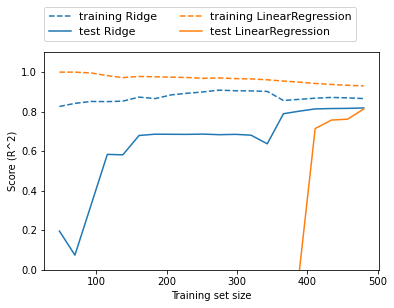

In [38]:
import mglearn

from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mglearn.plots.plot_ridge_n_samples()

위 그림을 보면 모든 데이터셋에 대해 릿지와 선형 회귀 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다. 릿지 회귀에는 규제가 적용되므로 릿지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터 점수보다 낮다.

그러나 테스트 데이터에서는 릿지의 점수가 더 높으며, 특별히 작은 데이터셋에서는 더 그렇다.

두 모델의 성능은 데이터가 많아질수로 졸아지고 마지막에는 선형 회귀가 릿지 회귀를 따라잡는다.

=> 데이터를 충분히 주면 규제 항은 중요성이 떨어진다.